In [ ]:
# Author: Kevin Richard
# tensorflow for Spam Filter
# Logistic Regression

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd


In [ ]:
#Download and import the spambase.data from the url.
!wget = https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data    #comment this line once execution is complete (else it will download multiple copies of the dataset)
filename = 'spambase.data'

--2023-03-11 23:16:58--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2023-03-11 23:16:58--  https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 702942 (686K) [application/x-httpd-php]
Saving to: ‘spambase.data’

spambase.data       100%[===================>] 686.47K  2.07MB/s    in 0.3s    

2023-03-11 23:16:59 (2.07 MB/s) - ‘spambase.data’ saved [702942/702942]

FINISHED --2023-03-11 23:16:59--
Total wall clock time: 0.6s
Downloaded: 1 files, 686K in 0.3s (2.07 MB/s)


In [ ]:
# from google.colab import files
# files.upload()  # Choose File "spambase.data"

In [ ]:
# Tarining and Testing data allocation.
testRatio = 0.3
dataset = np.loadtxt(filename, dtype='float32', delimiter=',')
target= dataset[:, -1]
labels = LabelEncoder().fit_transform(target)
features = dataset[:, 0:-1]
feature_std = StandardScaler().fit_transform(features)
x_train, x_test, y_train, y_test = train_test_split(feature_std, labels, test_size= testRatio, random_state = 0)


In [ ]:
# Print the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
column_names=['word_freq_make','word_freq_address','word_freq_all','word_freq_3d','word_freq_our','word_freq_over','word_freq_remove','word_freq_internet','word_freq_order','word_freq_mail','word_freq_receive','word_freq_will','word_freq_people','word_freq_report','word_freq_addresses','word_freq_free','word_freq_business','word_freq_email','word_freq_you','word_freq_credit','word_freq_your','word_freq_font','word_freq_000','word_freq_money','word_freq_hp','word_freq_hpl','word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857','word_freq_data','word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts','word_freq_pm','word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project','word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','char_freq_;','char_freq_(','char_freq_[','char_freq_!','char_freq_$','char_freq_#','capital_run_length_average','capital_run_length_longest','capital_run_length_total','spam']
data = pd.read_csv(url,na_values='?',names=column_names,comment='\t',sep=',',skipinitialspace=True)
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [ ]:
#Train & Test data set check size and features.
train_size, num_features = x_train.shape
test_size, test_features = x_test.shape

print(f"Train data size : {train_size}")
print(f"Number of Features : {num_features}")
print(f"Test data size : {test_size}")
print(f"Number of Features : {test_features}")

Train data size : 3220
Number of Features : 57
Test data size : 1381
Number of Features : 57


In [ ]:
#Logistic regression Model
class LogisticRegressionModel(object):

    def __init__(self, num_features):
        self.W = tf.Variable(tf.random.normal(shape=[num_features, 1])) # a column vector, initial weights follow the standard normal distribution
        self.b = tf.Variable(tf.random.normal(shape=[1, 1]))  # bias is a single value

    def __call__(self, X): # instance is called via this method: after e is created, call: e() <-- __call__ method will be called
        return self.likelihood(X)

    def likelihood(self, X): # where all the predicting and training happens
      raw_Y = tf.matmul(X, self.W) + self.b
      return tf.math.sigmoid(raw_Y)  # 1./(1. + tf.exp(-raw_Y)) is just the sigmoid function

    def predict(self, X): # prediction function
      p = self.likelihood(X)
      return p


In [ ]:
# the loss function
def compute_loss(y_pred, y_true):
  epsilon=1e-7
  y_pred = tf.clip_by_value(y_pred, epsilon, 1 - epsilon)
  loss = -tf.reduce_mean(y_true * tf.math.log(y_pred) + (1 - y_true) * tf.math.log(1 - y_pred))
  return loss


In [ ]:
# accuracy function
def accuracy(Output_values,y_data):
  accuracy1 = 0
  # number of correct predictions
  for i in range(len(y_data)):
    if Output_values[i] >= 0.5:
      predicted_y = 1
    else:
      predicted_y = 0
    eq = tf.cast(tf.equal(predicted_y, y_test[i]), tf.float32)  # eq is 0 if model does not predict correctly, or 1 if correctly
    accuracy1 = accuracy1 + eq.numpy()

  return accuracy1/len(y_data)

In [ ]:
# Define a training loop:
def training_loop(epochs,BATCH_SIZE,learning_rate):
  epoch_plot = []
  loss_plot = []
  model = LogisticRegressionModel(num_features)
  for i in epochs:
    rand_index = np.random.choice(train_size, size = BATCH_SIZE) # generate 100 random indices
    X = x_train[rand_index]  # given 100 random indices, choose 100 data points from train_data
    Y = np.transpose([y_train[rand_index]])  # get their true y values for those 100 data points

    with tf.GradientTape() as tape:
      loss = compute_loss(model(X), Y)  # compute the loss based on the model output and the true Y
      #loss = tf.keras.losses.BinaryCrossentropy()(Y, model(X)) # keras model for computing loss

    dW, db = tape.gradient(loss, [model.W, model.b])
    model.W.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)


    # print epoch and loss value every 100th iteration.
    if i % 100 == 0:
      print("=> epoch %2d: loss= %.2f" %(i, loss.numpy()))
      epoch_plot.append(i)
      loss_plot.append(loss.numpy())



##############  training is finished !!  ################3

  # predict values for x_test data set
  predicted_values = model.predict(x_test) # predicted labels are probabilities

  # Accuracy of test Data:
  print("accuracy:",accuracy(predicted_values,y_test))
  return accuracy(predicted_values,y_test),epoch_plot,loss_plot


In [ ]:
#plot the epoch to loss
def epoch_loss_plot(epoch_plot1, loss_plot1, lr_1, epoch_plot2, loss_plot2, lr_2, epoch_plot3, loss_plot3, lr_3):
  plt.plot(epoch_plot1, loss_plot1, label = f'{lr_1}', linewidth=2, color='blue')
  plt.plot(epoch_plot2, loss_plot2, label = f'{lr_2}', linewidth=2, color='orange')
  plt.plot(epoch_plot3, loss_plot3, label = f'{lr_3}', linewidth=2, color='green')
  plt.xlabel('epoch')
  plt.ylabel("loss")
  plt.title(f"epoch vs loss")
  plt.locator_params(axis='x', nbins=12)
  plt.legend(title = 'Learning Rate')
  plt.show()


=> epoch  0: loss= 2.04
=> epoch 100: loss= 2.88
=> epoch 200: loss= 2.72
=> epoch 300: loss= 2.24
=> epoch 400: loss= 2.24
=> epoch 500: loss= 2.08
=> epoch 600: loss= 2.73
=> epoch 700: loss= 2.40
=> epoch 800: loss= 2.72
=> epoch 900: loss= 3.83
=> epoch 1000: loss= 2.08
=> epoch 1100: loss= 2.24
=> epoch 1200: loss= 1.92
=> epoch 1300: loss= 1.76
=> epoch 1400: loss= 1.76
=> epoch 1500: loss= 2.56
=> epoch 1600: loss= 2.87
=> epoch 1700: loss= 2.24
=> epoch 1800: loss= 1.44
=> epoch 1900: loss= 2.40
accuracy: 0.8464880521361332
=> epoch  0: loss= 2.52
=> epoch 100: loss= 1.49
=> epoch 200: loss= 0.49
=> epoch 300: loss= 0.54
=> epoch 400: loss= 1.21
=> epoch 500: loss= 0.82
=> epoch 600: loss= 1.28
=> epoch 700: loss= 0.85
=> epoch 800: loss= 0.95
=> epoch 900: loss= 0.64
=> epoch 1000: loss= 0.69
=> epoch 1100: loss= 0.69
=> epoch 1200: loss= 0.60
=> epoch 1300: loss= 1.28
=> epoch 1400: loss= 0.53
=> epoch 1500: loss= 0.64
=> epoch 1600: loss= 0.91
=> epoch 1700: loss= 0.59
=> ep

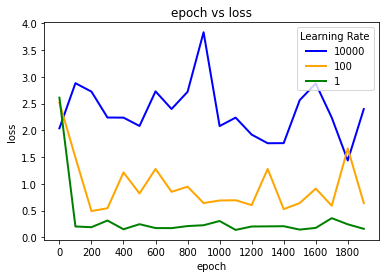

In [ ]:
# The same training set is trained with three different learning rates to plot

ep_1 = 2000
bs_1 = 100
lr_1 = 10000
accuracy1, epoch_plot1, loss_plot1 = training_loop(range(ep_1),bs_1,lr_1)
ep_2 = 2000
bs_2 = 100
lr_2 = 100
accuracy2, epoch_plot2, loss_plot2 = training_loop(range(ep_2),bs_2,lr_2)
ep_3 = 2000
bs_3 = 100
lr_3 = 1
accuracy3, epoch_plot3, loss_plot3 = training_loop(range(ep_3),bs_3,lr_3)

print("Logistic Regression")
epoch_loss_plot(epoch_plot1, loss_plot1,lr_1, epoch_plot2, loss_plot2,lr_2, epoch_plot3, loss_plot3,lr_3)


In [ ]:
def epoch_accuracy_plot(accuracies, epos):
  plt.plot(epos, accuracies, linewidth=2, color='blue')
  plt.xlabel('lr')
  plt.ylabel("accuracy")
  plt.title(f"lr vs accuracy")
  plt.locator_params(axis='x', nbins=12)
  plt.show()

=> epoch  0: loss= 3.38
=> epoch 100: loss= 0.35
=> epoch 200: loss= 0.21
=> epoch 300: loss= 0.25
=> epoch 400: loss= 0.22
=> epoch 500: loss= 0.29
=> epoch 600: loss= 0.21
=> epoch 700: loss= 0.19
=> epoch 800: loss= 0.16
=> epoch 900: loss= 0.24
accuracy: 0.9196234612599565
=> epoch  0: loss= 2.23
=> epoch 100: loss= 0.49
=> epoch 200: loss= 0.28
=> epoch 300: loss= 0.20
=> epoch 400: loss= 0.33
=> epoch 500: loss= 0.40
=> epoch 600: loss= 0.19
=> epoch 700: loss= 0.48
=> epoch 800: loss= 0.38
=> epoch 900: loss= 0.39
accuracy: 0.8863142650253439
=> epoch  0: loss= 1.86
=> epoch 100: loss= 0.59
=> epoch 200: loss= 0.52
=> epoch 300: loss= 0.90
=> epoch 400: loss= 0.25
=> epoch 500: loss= 0.29
=> epoch 600: loss= 0.55
=> epoch 700: loss= 0.43
=> epoch 800: loss= 0.52
=> epoch 900: loss= 0.68
accuracy: 0.8986241853729182
=> epoch  0: loss= 2.21
=> epoch 100: loss= 0.46
=> epoch 200: loss= 0.87
=> epoch 300: loss= 0.84
=> epoch 400: loss= 1.31
=> epoch 500: loss= 0.86
=> epoch 600: los

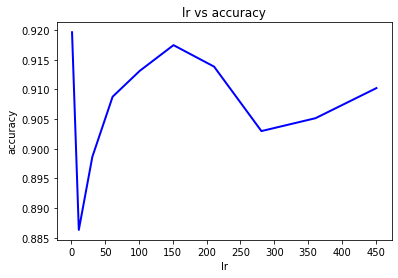

In [ ]:
# for epoch vs loss plots for varying Learning Rates

accuracies=[]
lrs = []
epo = 1000
lr = 1
for i in range(10):
  lr = lr + i*10
  acc, _ , _ = training_loop(range(epo),100,lr)
  accuracies.append(acc)
  lrs.append(lr)

print("Logistic Regression")
epoch_accuracy_plot(accuracies, lrs )